In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import copy 

from skimage.draw import polygon_perimeter
from skimage import transform
from skimage.color import rgb2gray

c:\users\wit_w\appdata\local\programs\python\python38\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


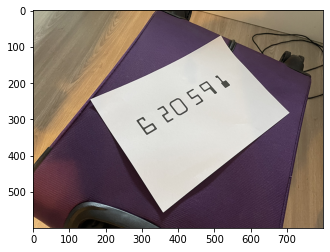

In [2]:
img = plt.imread("endcode.bmp")

plt.imshow(img)

# Image alignment
#### https://scikit-image.org/docs/dev/user_guide/geometrical_transform.html

In [ ]:
src = np.array([[0, 0], [0, 100], [900, 100], [900, 0]])
dst = np.array([[218, 339], [249, 385], [600, 174], [571, 143]])

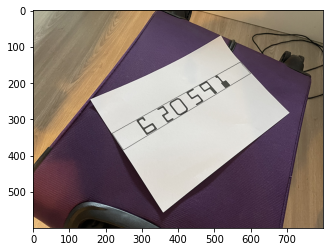

In [3]:
rr, cc  = polygon_perimeter(dst[:, 1], dst[: , 0], img.shape[:2], clip =True)
drawp_img = copy.deepcopy(img)
drawp_img[rr, cc] = [0, 0 ,0]

plt.imshow(drawp_img)

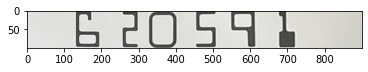

In [5]:
tform = transform.ProjectiveTransform()
tform.estimate(src, dst)
warped = transform.warp(img, tform, output_shape=(100, 900))

plt.imshow(warped)

# RGB to Binary

In [6]:
grayscale = rgb2gray(warped) * 255
grayscale = grayscale.astype(int)

In [9]:
binary_threshold = 200

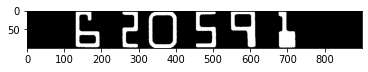

In [11]:
binary = grayscale < binary_threshold

plt.imshow(binary, cmap='gray')

# Scale image

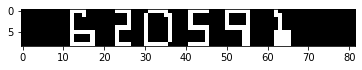

In [15]:
scale = transform.resize(binary, (9, 82))

plt.imshow(scale, cmap='gray')

# Define prototype of number 0 - 9

In [17]:
prot = np.zeros((10, 9, 7))

In [18]:
prot[0]= [[0, 1, 1, 1, 1, 1, 0],
          [1, 0, 0, 0, 0, 0, 1],
          [1, 0, 0, 0, 0, 0, 1],
          [1, 0, 0, 0, 0, 0, 1],
          [1, 0, 0, 0, 0, 0, 1],
          [1, 0, 0, 0, 0, 0, 1],
          [1, 0, 0, 0, 0, 0, 1],
          [1, 0, 0, 0, 0, 0, 1],
          [0, 1, 1, 1, 1, 1, 0]]

prot[1]= [[0, 0, 0, 1, 1, 0, 0],
          [0, 0, 0, 0, 1, 0, 0],
          [0, 0, 0, 0, 1, 0, 0],
          [0, 0, 0, 0, 1, 0, 0],
          [0, 0, 0, 0, 1, 0, 0],
          [0, 0, 0, 1, 1, 1, 1],
          [0, 0, 0, 1, 1, 1, 1],
          [0, 0, 0, 1, 1, 1, 1],
          [0, 0, 0, 1, 1, 1, 1]]

prot[2]= [[0, 0, 0, 1, 1, 1, 1],
          [0, 0, 0, 0, 0, 0, 1],
          [0, 0, 0, 0, 0, 0, 1],
          [0, 0, 0, 0, 0, 0, 1],
          [0, 0, 0, 1, 1, 1, 1],
          [0, 0, 0, 1, 0, 0, 0],
          [0, 0, 0, 1, 0, 0, 0],
          [0, 0, 0, 1, 0, 0, 0],
          [0, 0, 0, 1, 1, 1, 1]]

prot[3]= [[0, 0, 1, 1, 1, 1, 0],
          [0, 0, 0, 0, 0, 1, 0],
          [0, 0, 0, 0, 0, 1, 0],
          [0, 0, 0, 0, 0, 1, 0],
          [0, 0, 1, 1, 1, 1, 1],
          [0, 0, 0, 0, 0, 1, 1],
          [0, 0, 0, 0, 0, 1, 1],
          [0, 0, 0, 0, 0, 1, 1],
          [0, 0, 1, 1, 1, 1, 1]]

prot[4]= [[0, 1, 1, 0, 0, 0, 0],
          [0, 1, 1, 0, 0, 0, 0],
          [0, 1, 1, 0, 0, 0, 0],
          [0, 1, 1, 0, 0, 0, 0],
          [0, 1, 1, 0, 0, 0, 0],
          [0, 1, 1, 0, 0, 1, 1],
          [0, 1, 1, 1, 1, 1, 1],
          [0, 0, 0, 0, 0, 1, 1],
          [0, 0, 0, 0, 0, 1, 1]]

prot[5]= [[0, 0, 1, 1, 1, 1, 1],
          [0, 0, 1, 0, 0, 0, 0],
          [0, 0, 1, 0, 0, 0, 0],
          [0, 0, 1, 0, 0, 0, 0],
          [0, 0, 1, 1, 1, 1, 1],
          [0, 0, 0, 0, 0, 0, 1],
          [0, 0, 0, 0, 0, 0, 1],
          [0, 0, 0, 0, 0, 0, 1],
          [0, 0, 1, 1, 1, 1, 1],]

prot[6]= [[0, 1, 1, 1, 1, 0, 0],
          [0, 1, 0, 0, 1, 0, 0],
          [0, 1, 0, 0, 0, 0, 0],
          [0, 1, 0, 0, 0, 0, 0],
          [0, 1, 0, 0, 0, 0, 0],
          [0, 1, 1, 1, 1, 1, 1],
          [0, 1, 0, 0, 0, 0, 1],
          [0, 1, 0, 0, 0, 0, 1],
          [0, 1, 1, 1, 1, 1, 1]]

prot[7]= [[0, 0, 1, 1, 1, 1, 1],
          [0, 0, 1, 0, 0, 0, 1],
          [0, 0, 1, 0, 0, 0, 1],
          [0, 0, 0, 0, 0, 0, 1],
          [0, 0, 0, 0, 0, 1, 0],
          [0, 0, 0, 0, 1, 0, 0],
          [0, 0, 0, 0, 1, 0, 0],
          [0, 0, 0, 0, 1, 0, 0],
          [0, 0, 0, 0, 1, 0, 0]]

prot[8]= [[0, 1, 1, 1, 1, 1, 0],
          [0, 1, 0, 0, 0, 1, 0],
          [0, 1, 0, 0, 0, 1, 0],
          [0, 1, 0, 0, 0, 1, 0],
          [0, 1, 1, 1, 1, 1, 0],
          [1, 1, 0, 0, 0, 1, 1],
          [1, 1, 0, 0, 0, 1, 1],
          [1, 1, 0, 0, 0, 1, 1],
          [1, 1, 1, 1, 1, 1, 1]]

prot[9]= [[0, 1, 1, 1, 1, 1, 1],
          [0, 1, 0, 0, 0, 0, 1],
          [0, 1, 0, 0, 0, 0, 1],
          [0, 1, 0, 0, 0, 0, 1],
          [0, 1, 1, 1, 1, 1, 1],
          [0, 0, 0, 0, 0, 1, 1],
          [0, 0, 0, 0, 0, 1, 1],
          [0, 0, 0, 0, 0, 1, 1],
          [0, 0, 0, 0, 0, 1, 1]]

# Prototype Matching

##### [[ Probability, Prototype ], ...]

In [26]:
prob_of_prot = []

In [27]:
for w in range(scale.shape[1]):
    
    if w + 7 >= scale.shape[1]:
        break
    
    for p in range(prot.shape[0]):

        prototype = prot[p]
        
        sub_img = scale[0:9, w:w + 7]
        
        score = 0
        
        for row in range(prototype.shape[0]):
            for col in range(prototype.shape[1]):
                
                if prototype[row, col] == sub_img[row, col]:
                    score += 1
                    
        prob = score / (prototype.shape[0] * prototype.shape[1])
        
        if prob > 0.95:

            prob_of_prot.append([prob, p])

            

In [28]:
prob_of_prot

[[1.0, 6],
 [1.0, 2],
 [0.9682539682539683, 0],
 [1.0, 5],
 [1.0, 9],
 [0.9682539682539683, 1]]

# Answers

In [29]:
for i in prob_of_prot:
    print(i[1])

6
2
0
5
9
1
